In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
path = r"E:\coding\CSV\mental_health.csv"
df = pd.read_csv(path)

In [4]:
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [5]:
df.rename(columns={ "label": "mental_health_issue"}, inplace = True)
df

,text,mental_health_issue
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   text                 27977 non-null  object
 1   mental_health_issue  27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [8]:
df["mental_health_issue"].value_counts()

mental_health_issue
0    14139
1    13838
Name: count, dtype: int64

<Axes: title={'center': 'mental health issue data'}, xlabel='mental issue', ylabel='no of reports'>

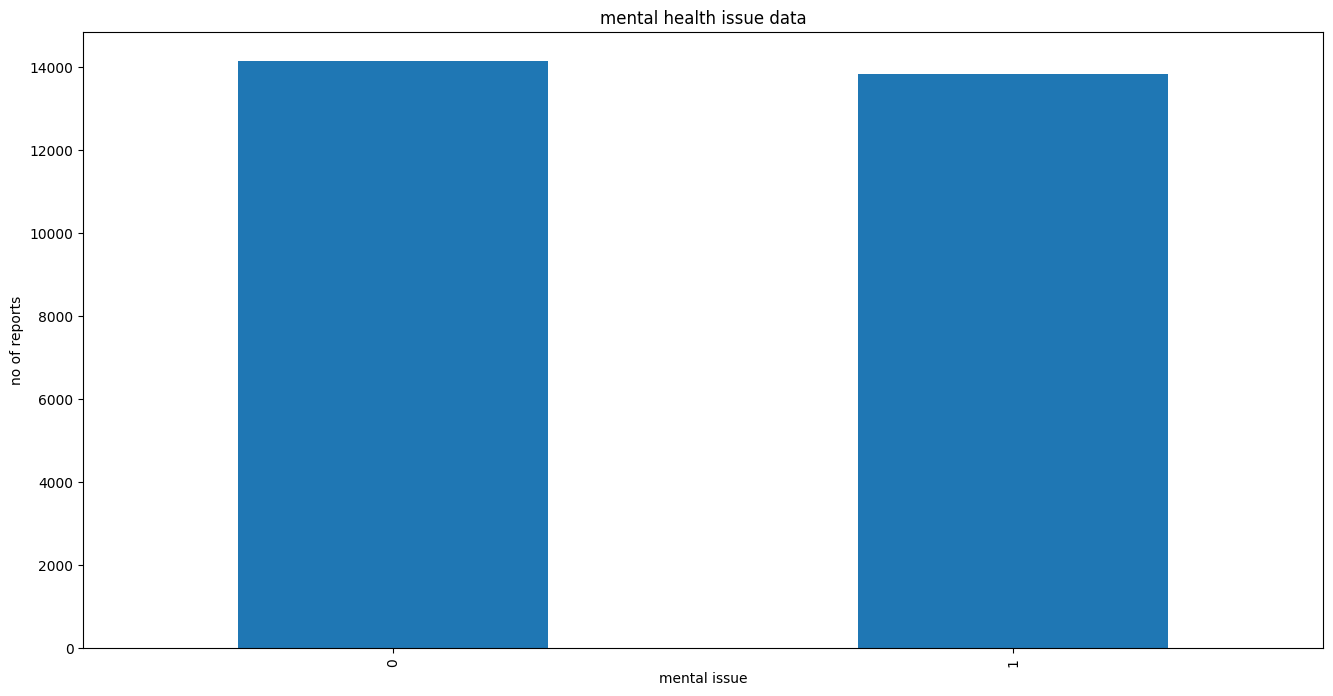

In [9]:
df["mental_health_issue"].value_counts().plot(kind="bar", xlabel = "mental issue", ylabel = "no of reports",  figsize=(16,8), title="mental health issue data")

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text, df.mental_health_issue, test_size=0.25)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [12]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb_model", MultinomialNB())
])

In [13]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('nb_model', MultinomialNB())])

In [14]:
clf.score(X_test, y_test)

0.8347390993566833

In [15]:
import matplotlib.pyplot as plt
from sklearn import metrics

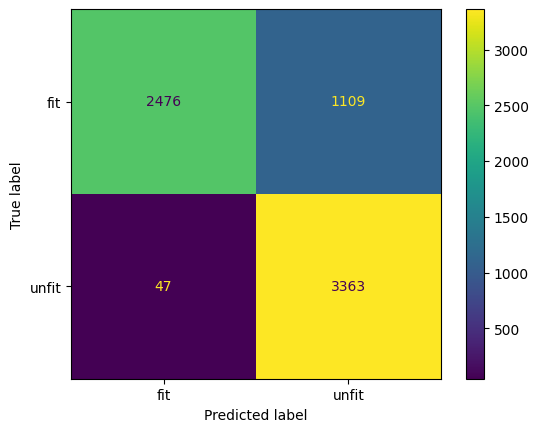

In [16]:
actual = y_test
predicted = clf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["fit", "unfit"])

cm_display.plot()
plt.show()